# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [ ]:
import os
import pandas as pd
from google.colab import files


uploaded = files.upload()


df = pd.read_csv("StudentsPerformance.csv")



## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


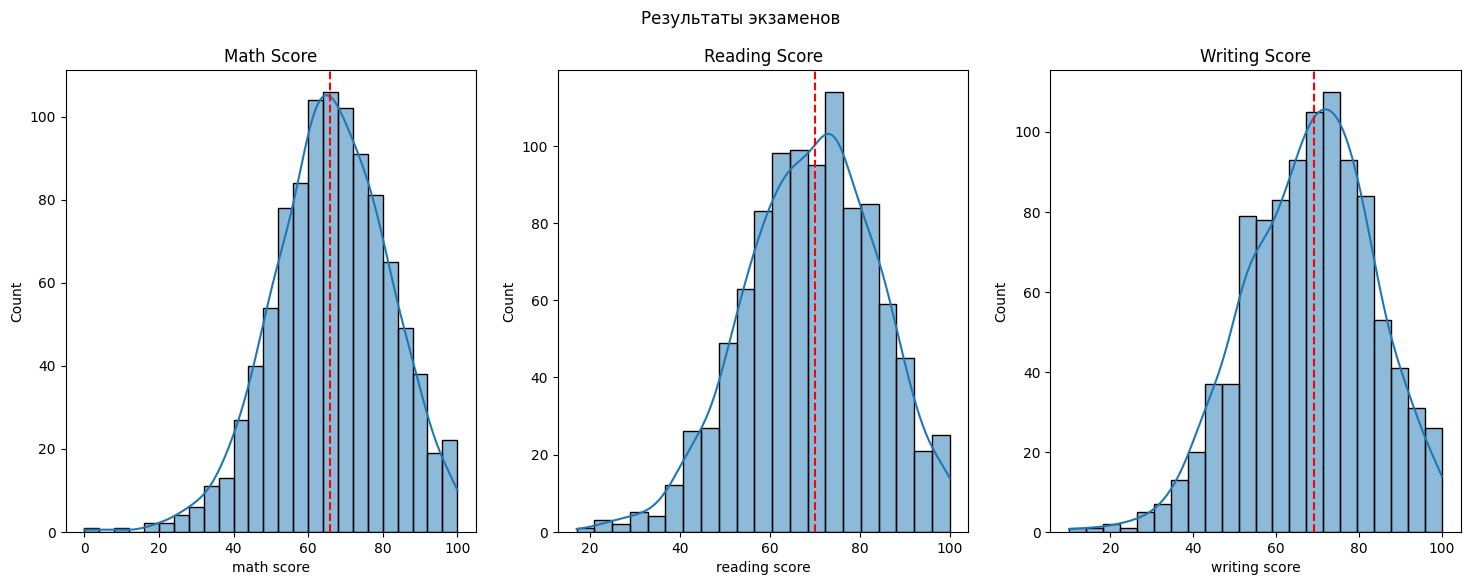

Медианное значение по математике: 66.0
Медианное значение по чтению: 70.0
Медианное значение по письму: 69.0


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("StudentsPerformance.csv")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'], kde=True, ax=axes[0])
axes[0].set_title('Math Score')
axes[0].axvline(df['math score'].median(), color='red', linestyle='--')

sns.histplot(df['reading score'], kde=True, ax=axes[1])
axes[1].set_title('Reading Score')
axes[1].axvline(df['reading score'].median(), color='red', linestyle='--')

sns.histplot(df['writing score'], kde=True, ax=axes[2])
axes[2].set_title('Writing Score')
axes[2].axvline(df['writing score'].median(), color='red', linestyle='--')

plt.show()

print("Медианное значение по математике:", df['math score'].median())
print("Медианное значение по чтению:", df['reading score'].median())
print("Медианное значение по письму:", df['writing score'].median())

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


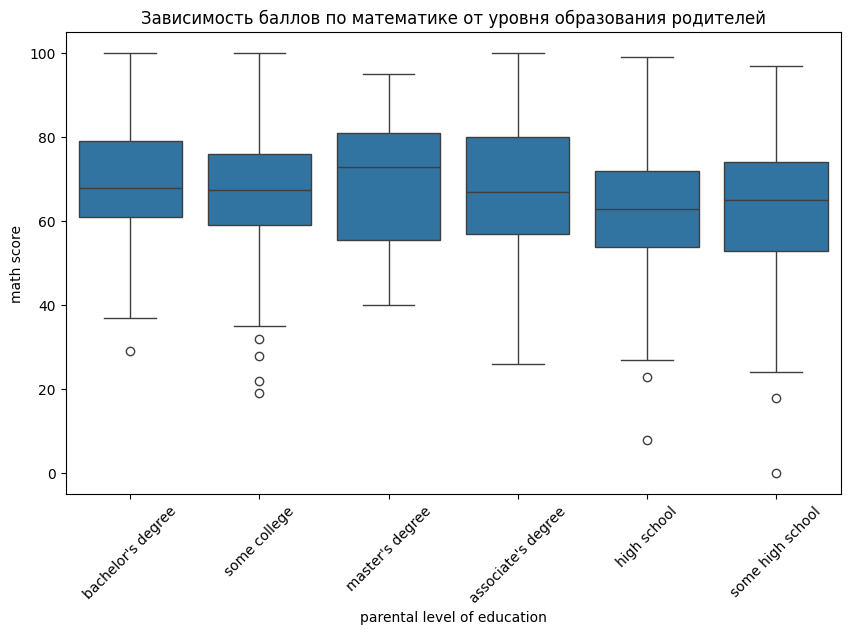

In [6]:
parent_education_counts = df['parental level of education'].value_counts()
print(parent_education_counts)

plt.figure(figsize=(10, 6))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title('Зависимость баллов по математике от уровня образования родителей')
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [7]:
high_achieving_girls = df[(df['gender'] == 'female') &
                          (df['math score'] > 90) &
                          (df['reading score'] > 90) &
                          (df['writing score'] > 90)]


print("Количество студенток, набравших больше 90 баллов по всем предметам:", len(high_achieving_girls))

Количество студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [11]:
gender_scores = df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

print(gender_scores)

       math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [12]:
meal_test_prep_scores = df.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
})

print(meal_test_prep_scores)

                                             math score  reading score  \
gender lunch        test preparation course                              
female free/reduced completed                 60.785714      73.428571   
                    none                      52.890756      63.831933   
       standard     completed                 71.131579      79.798246   
                    none                      66.530233      73.386047   
male   free/reduced completed                 65.639344      65.786885   
                    none                      60.609524      59.076190   
       standard     completed                 75.955752      72.601770   
                    none                      69.832512      64.719212   

                                             writing score  
gender lunch        test preparation course                 
female free/reduced completed                    74.371429  
                    none                         61.781513  
       standard

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

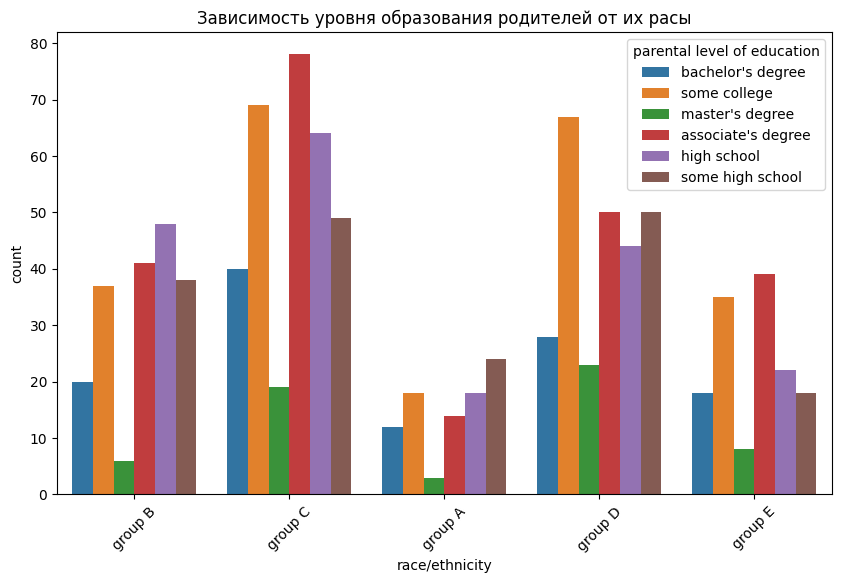

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race/ethnicity', hue='parental level of education', data=df)
plt.title('Зависимость уровня образования родителей от их расы')
plt.xticks(rotation=45)
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

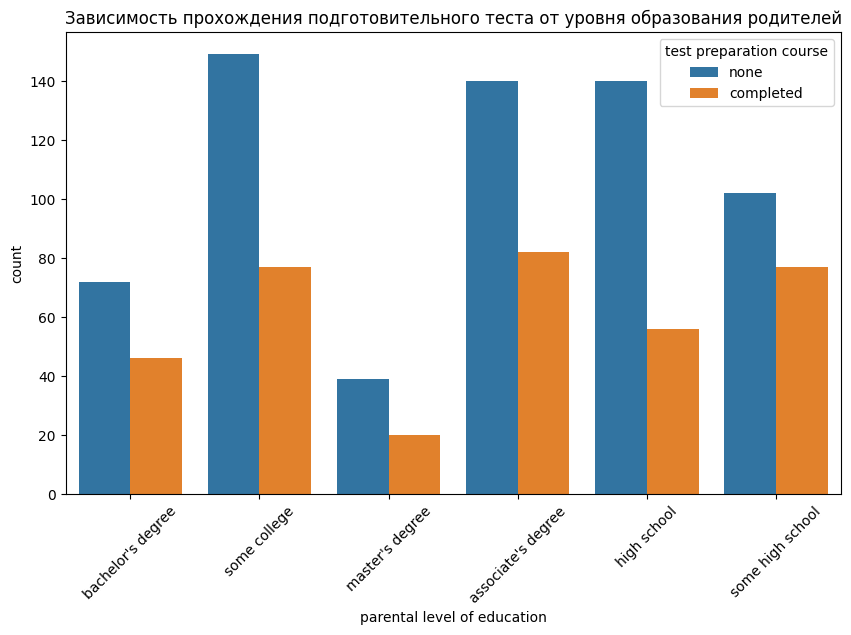

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', hue='test preparation course', data=df)
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

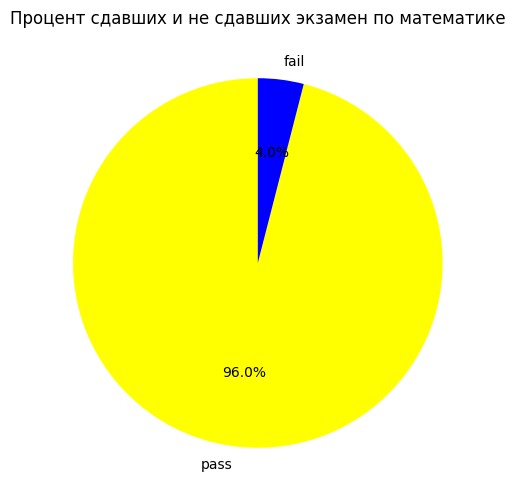

In [17]:

df['math pass/fail'] = df['math score'].apply(lambda x: 'pass' if x >= 40 else 'fail')


pass_fail_counts = df['math pass/fail'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(pass_fail_counts, labels=pass_fail_counts.index, autopct='%1.1f%%', startangle=90, colors=['yellow', 'blue'])
plt.title('Процент сдавших и не сдавших экзамен по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

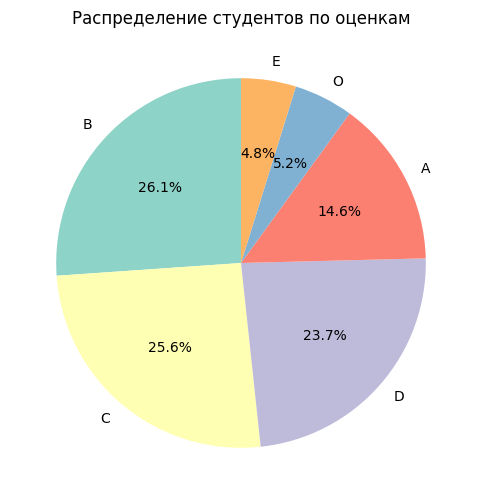

In [19]:

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    avg_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if avg_score >= 90:
        return 'O'
    elif avg_score >= 80:
        return 'A'
    elif avg_score >= 70:
        return 'B'
    elif avg_score >= 60:
        return 'C'
    elif avg_score >= 41:
        return 'D'
    else:
        return 'E'


df['grade'] = df.apply(assign_grade, axis=1)


grade_counts = df['grade'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

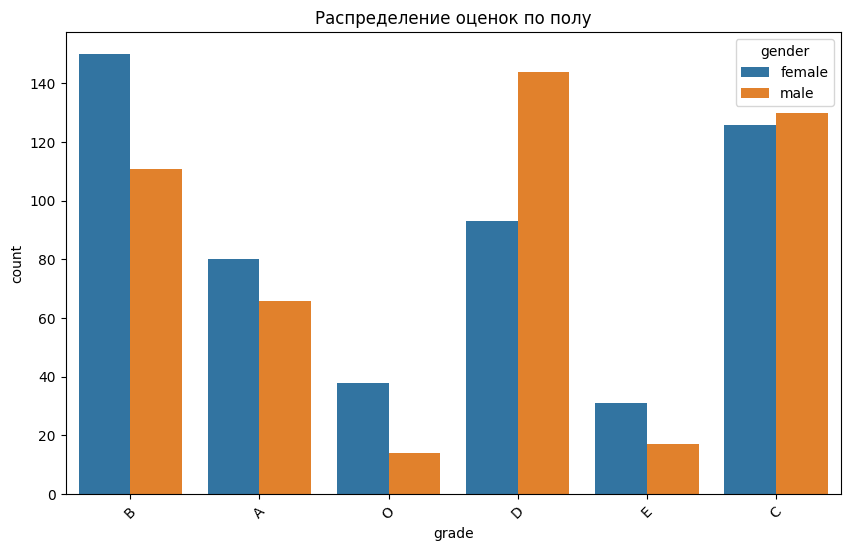

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df)
plt.title('Распределение оценок по полу')
plt.xticks(rotation=45)
plt.show()